Exploratory Data Analysis

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded =files.upload()


Saving aerofit_treadmill.txt to aerofit_treadmill.txt


In [ ]:
df=pd.read_csv('aerofit_treadmill.txt')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Insights:

*   From the above analysis, its clear that, there are totally 9 columns and 180 rows with zero null values.


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Insights:

*   Standard deviation of Income and miles are high. They might have outliers in it.
*   Minimum and maximum age of people are 18 and 50.
*   75 % of people are in age less than or equal to 33.





In [ ]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


Insights:

*   There are three unique product in the dataset.
*   KP281 is the most frequent product.
*   There are totally 180 members in that, 104 are males and rest are females.





In [ ]:
df.duplicated().sum()

0

Outliers detection

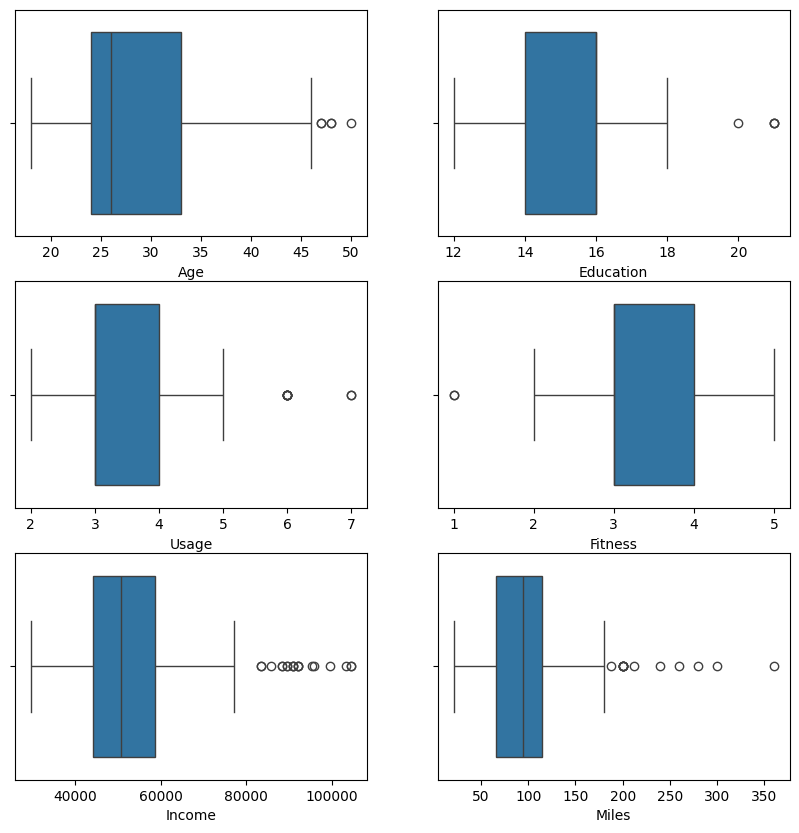

In [ ]:
figure,axis= plt.subplots(3,2, figsize=(10,10))
sns.boxplot(data=df, x='Age', ax=axis[0,0])
sns.boxplot(data=df,x='Education', ax=axis[0,1])
sns.boxplot(data=df,x='Usage', ax=axis[1,0])
sns.boxplot(data=df,x='Fitness', ax=axis[1,1])
sns.boxplot(data=df,x='Income', ax=axis[2,0])
sns.boxplot(data=df, x='Miles',ax=axis[2,1])
plt.show()


Insights:

*   Income and Miles are showing more outliers.
*   There are more outliers , therefore its important to find median of the attributes so that will get correct inference.



Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781

In [ ]:
df['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [ ]:
df['Product'].value_counts(normalize=True)

,proportion
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [ ]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Male,0.577778
Female,0.422222


In [ ]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [ ]:
df['MaritalStatus'].value_counts(normalize=True)

,proportion
MaritalStatus,
Partnered,0.594444
Single,0.405556


Univariate Analysis

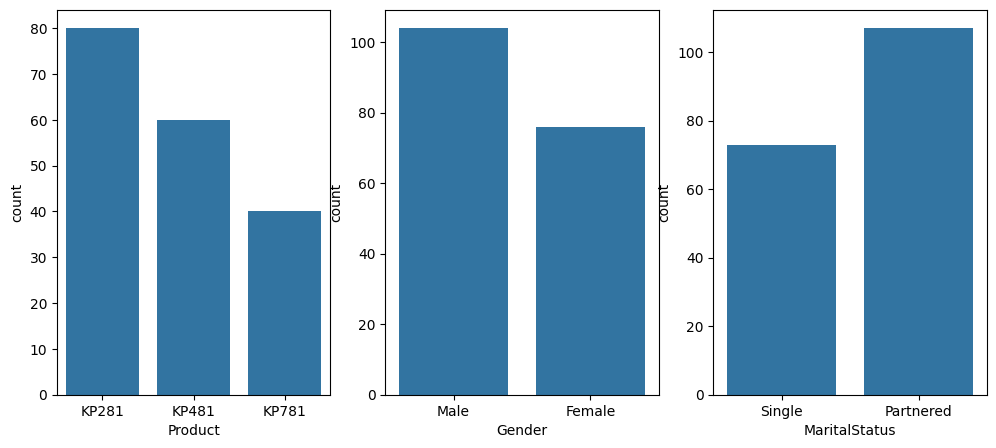

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
sns.countplot(data=df, x="Product",ax=axis[0])
sns.countplot(data=df, x="Gender", ax=axis[1])
sns.countplot(data=df,x='MaritalStatus',ax=axis[2])
plt.show()

Insights:

*   KP281 is the most frequently sold product by customers with 44%, followed by KP281 of 33% and KP181 of 22%.
*   Male share is 57 % which higher than female 42%.
*   Married people (59%) perfer to buy treadmill than single(40%).

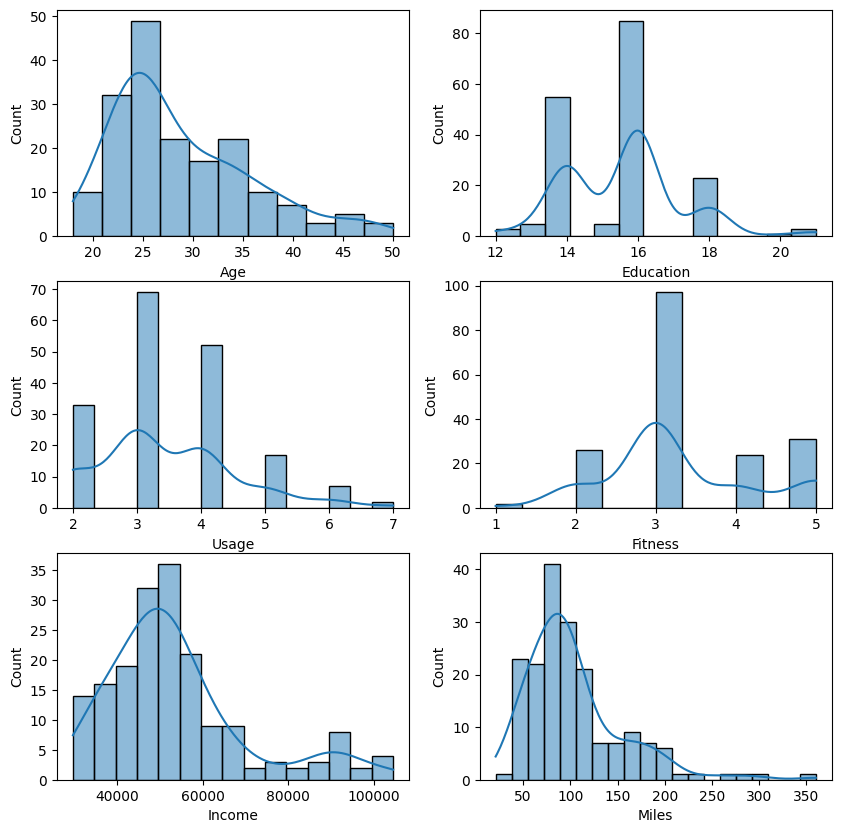

In [ ]:
fig, axis = plt.subplots(3, 2, figsize=(10, 10))
sns.histplot(data=df, x='Age', kde=True, ax=axis[0, 0])
sns.histplot(data=df, x='Education', kde=True, ax=axis[0, 1])
sns.histplot(data=df, x='Usage', kde=True, ax=axis[1, 0])
sns.histplot(data=df, x='Fitness', kde=True, ax=axis[1, 1])
sns.histplot(data=df, x='Income', kde=True,ax=axis[2, 0])
sns.histplot(data=df, x="Miles", kde=True,ax=axis[2, 1])
plt.show()

Insights:

*   Most of the purchases are made my customer who fall under age a range of 23 and 26
*   Customers who prefer to buy treadmill have moderate level of education.
*   The usuage of treadmill by customers are mostly three to  four times a week.
*   The annual income of customers fall around 40000-60000 dollars.
*   Customers perfered to walk around 70-80 miles in a week.







Check if features like marital status, age have any effect on the product purchased - Bivariate analysis.

In [ ]:
#Distribution of gender and marital status of products in each category:
pd.crosstab(df['Gender'],df['Product'] )


Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [ ]:
pd.crosstab(df['Gender'],df['Product'] ,normalize=True)

Product,KP281,KP481,KP781
Gender,,,
Female,0.222222,0.161111,0.038889
Male,0.222222,0.172222,0.183333


In [ ]:
pd.crosstab(df['MaritalStatus'], df['Product'])

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


In [ ]:
pd.crosstab(df['MaritalStatus'], df['Product'],normalize=True)

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.266667,0.200000,0.127778
Single,0.177778,0.133333,0.094444


Text(0.5, 1.0, 'product vs gender')

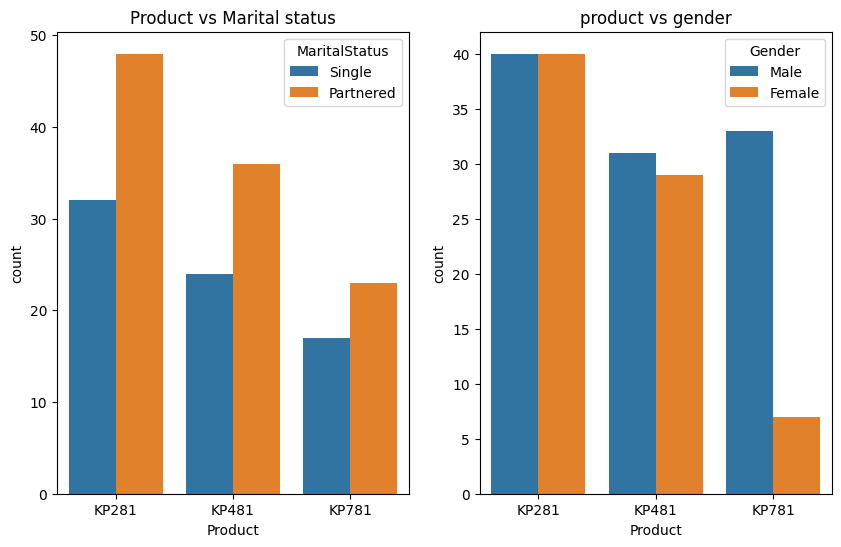

In [ ]:
fig,axis= plt.subplots(1,2, figsize=(10,6))
sns.countplot(data=df, x='Product', hue='MaritalStatus', ax=axis[0])
sns.countplot(data=df, x="Product", hue="Gender", ax= axis[1])
axis[0].set_title('Product vs Marital status')
axis[1].set_title("product vs gender")

Insights:

*   treadmill are mostly used by couples than singles , from that KP281 was highly used by them 48% and least used product is KP781 23%.
*   Married and singles perfer buying the cheapest treadmill.
*   Both male and female perfered to buy KP281 treadmill where as the highend model KP781 is mostly used by males and very less number of females buy KP781.



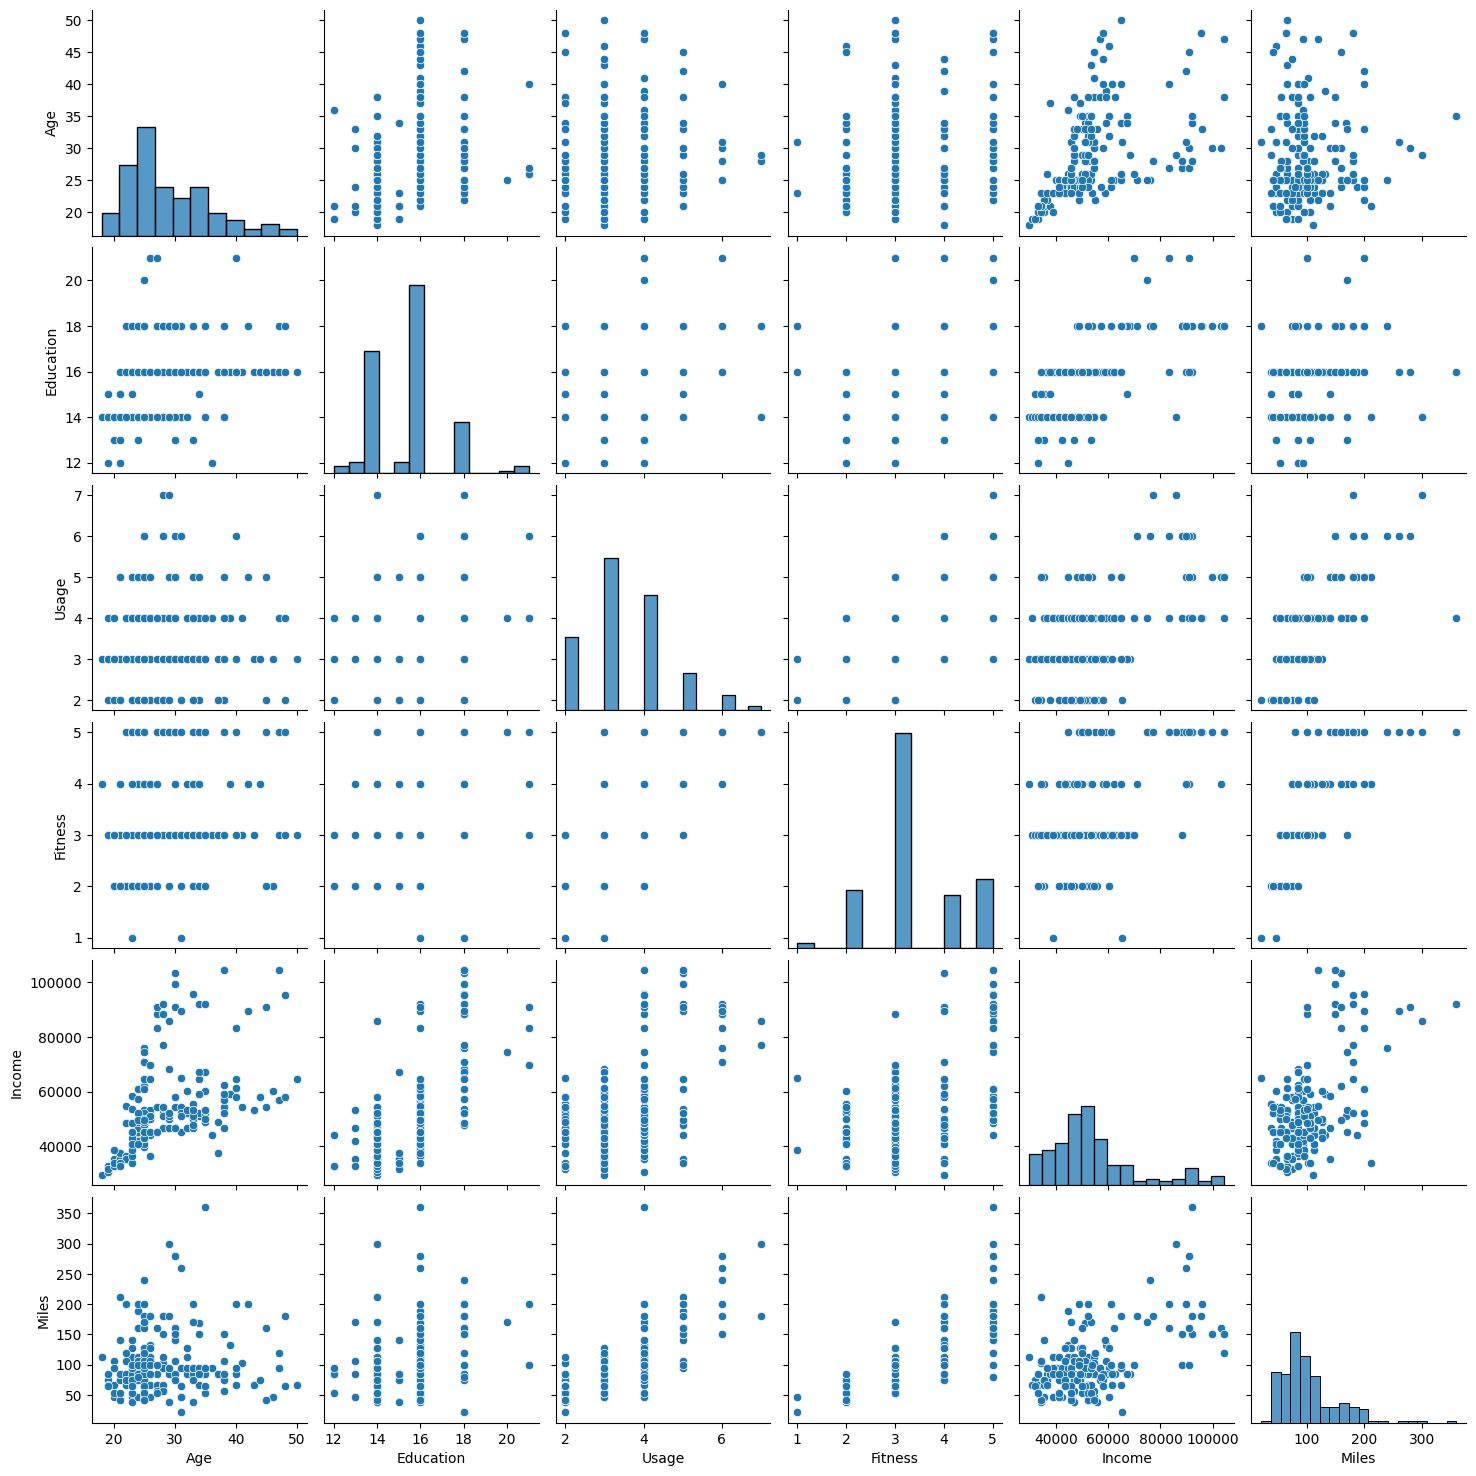

In [ ]:
#Check correlation among different factors using heat maps or pair plots.
sns.pairplot(df)

In [ ]:
df['Usage']=df['Usage'].astype('int')
df['Fitness']=df['Fitness'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


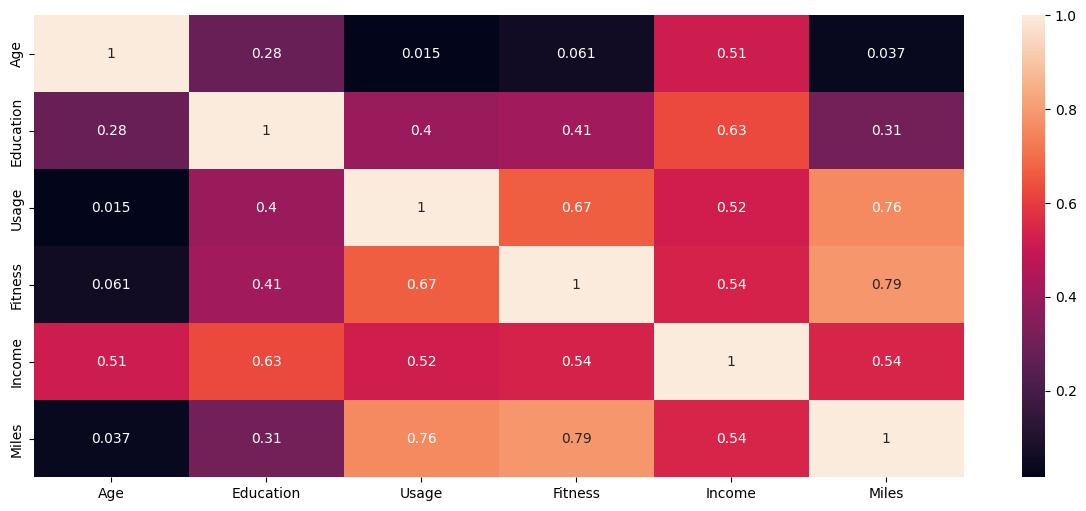

In [ ]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number'])
# Calculate the correlation matrix
corr_mat = numerical_features.corr()
# Plotting the heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(corr_mat, annot=True)

plt.show()

Insights:

*   From this map, its clear that age and income are positively correlated, meaning age increases , income tend to increase as well.
*   Usage is positively correlated with fitness and miles, means that regular exercises contributes to improved fitness and helps to use treadmill for longer duration.



Customer profiling:

*   youngesters [25-30] - people in this age group are more curious to start work out and buy KP281 and KP481 treadmill products.
*   We can introduce more products at this price range and cover these age groups by giving offers.

* Educated people: These category tend to buy high end product (KP781) because they concentrate more in fitness and are economically manageable due to their stable income.
*   Therefore, we need to plan a marketing strategy by giving corporate offer schemes so that we can attract more professional customers.

*   Married/single: Its observed that single is mainly buying cheap product.They may be a student or a person who just started working.We can plan to visit colleges spread awareness and motivate them for their fitness and buy our economical Treadmills. We can introduce more models around this segment which will definitely help generate revenue ,although not much margin but volumes will be high. and if our quality is good he /she will be our future customer for our high end models.
*   Since many married people are buying our Treadmills mostly KP281. That infers that there is big scope of introducing more models around it since mane married and singles are buying low end Treadmills due to cost involved.







Recommendation:

Based on the customer profiling and socio-economic factors, we can create targeted marketing strategies for each group.

There is a significant market for entry-level products, making up 78% of sales, providing a great opportunity to attract customers.

Once customers are on board and have a positive experience, we can introduce them to advanced treadmills.

We can use digital media, such as social media and YouTube, to reach these customers by using profiles from an agency.

Additionally, organizing fitness events in targeted areas will help promote our products.

With these strategies, we can increase market share and boost revenue.